# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import time
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
units = "metric"

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | cestos city
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | juan griego
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | yuzhno-kurilsk
Processing Record 10 of Set 1 | alotau
Processing Record 11 of Set 1 | lae
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | linxia chengguanzhen
Processing Record 19 of Set 1 | ishinomaki
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | jhang sadr
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-27.01,96,99,3.34,RU,1738753479
1,ribeira grande,38.5167,-28.7000,18.22,94,75,6.26,PT,1738753480
2,cestos city,5.4600,-9.5828,28.75,67,12,2.26,LR,1738753482
3,dudinka,69.4058,86.1778,-24.91,99,95,1.39,RU,1738753483
4,cabo san lucas,22.8909,-109.9124,16.27,61,0,4.51,MX,1738753213


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-27.01,96,99,3.34,RU,1738753479
1,ribeira grande,38.5167,-28.7000,18.22,94,75,6.26,PT,1738753480
2,cestos city,5.4600,-9.5828,28.75,67,12,2.26,LR,1738753482
3,dudinka,69.4058,86.1778,-24.91,99,95,1.39,RU,1738753483
4,cabo san lucas,22.8909,-109.9124,16.27,61,0,4.51,MX,1738753213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

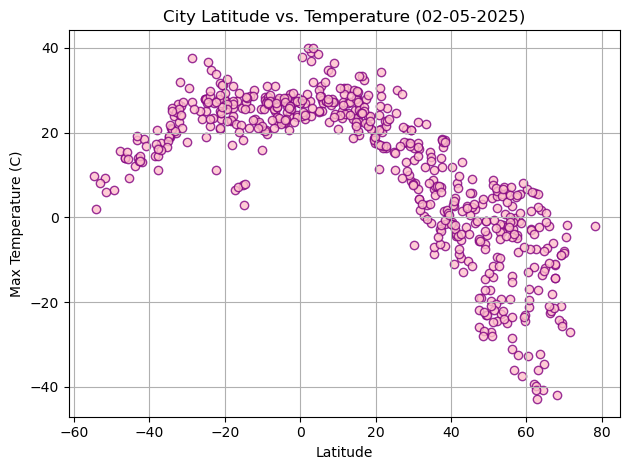

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, c = "pink", edgecolors="purple")

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Graphs/LatvTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

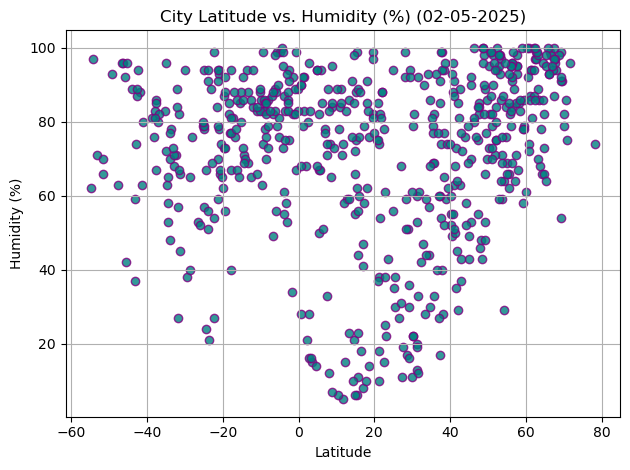

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, c = "teal", edgecolors="purple")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Graphs/LatvHum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

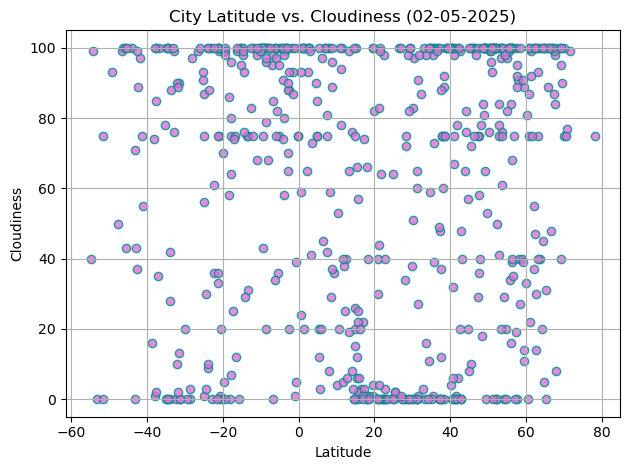

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, c = "orchid", edgecolors="darkcyan")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Graphs/LatvCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

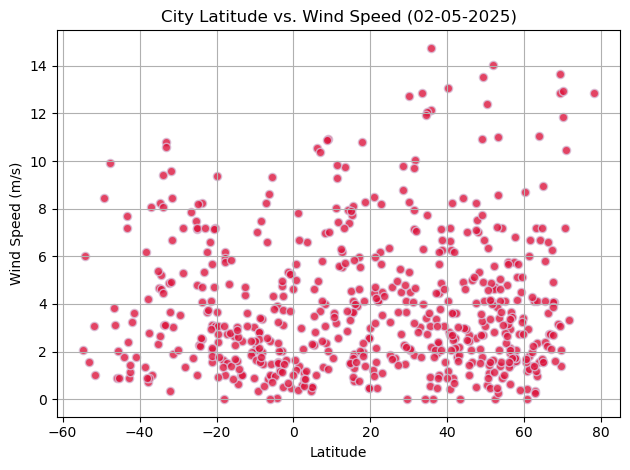

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, c = "crimson", edgecolors="thistle")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Graphs/LatvWind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = (x * slope) + intercept
    return regress_values, slope, intercept, rvalue

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-27.01,96,99,3.34,RU,1738753479
1,ribeira grande,38.5167,-28.7000,18.22,94,75,6.26,PT,1738753480
2,cestos city,5.4600,-9.5828,28.75,67,12,2.26,LR,1738753482
3,dudinka,69.4058,86.1778,-24.91,99,95,1.39,RU,1738753483
4,cabo san lucas,22.8909,-109.9124,16.27,61,0,4.51,MX,1738753213


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,alotau,-10.3069,150.4462,25.68,88,100,3.01,PG,1738753488
9,lae,-6.7221,146.9847,25.10,82,98,0.83,PG,1738753489
13,grytviken,-54.2811,-36.5092,2.06,97,99,6.01,GS,1738753494
15,port mathurin,-19.6833,63.4167,27.49,73,5,2.38,MU,1738753496
20,port-aux-francais,-49.3500,70.2167,6.55,93,93,8.44,TF,1738753502


###  Temperature vs. Latitude Linear Regression Plot

C:\Users\12182\AppData\Local\Temp\ipykernel_16396\98230004.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "-r", color="darkmagenta")


The r-value is -0.8463752436042711


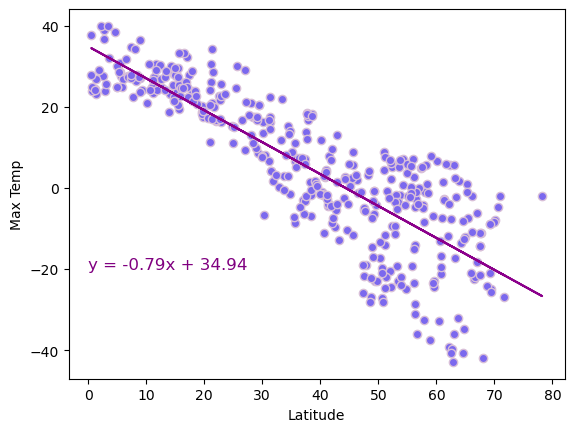

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, c = "mediumslateblue", edgecolors="thistle")
plt.plot(x_values, regress_values, "-r", color="darkmagenta")
plt.annotate(line_eq,(0,-20),fontsize=12,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.5282284497372104


C:\Users\12182\AppData\Local\Temp\ipykernel_16396\4016018378.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "-r", c="saddlebrown")


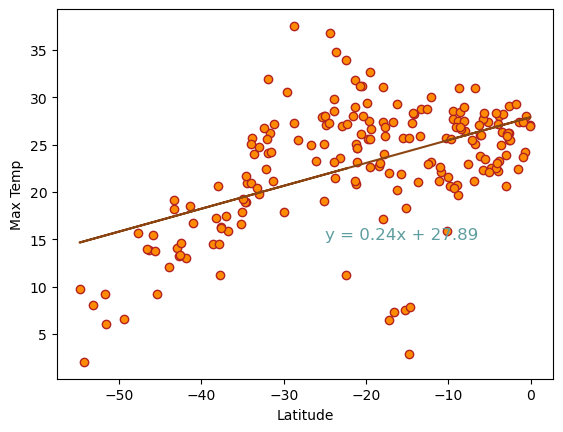

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, c = "darkorange", edgecolors="firebrick")
plt.plot(x_values, regress_values, "-r", c="saddlebrown")
plt.annotate(line_eq,(-25,15),fontsize=12,color="cadetblue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 

When looking at the linear regression in the Northern Hemisphere, you'll notice a negative relationship between temp and latitude. This may be due to the increase in latitude as you move further away from the equator. As you can see, the move you move away fromt he equator, the overall temp will drop. 

When looking at the linear regression in the Southern Hemisphere, you see a positive correlation between temp and latitude. Inversely to that of the linear relationship in the Northern Hemisphere, as the latitude increases, the distance from the equator decreases, which increaeses the overall temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3932791418514868


C:\Users\12182\AppData\Local\Temp\ipykernel_16396\3401538137.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "-r", color="darkmagenta")


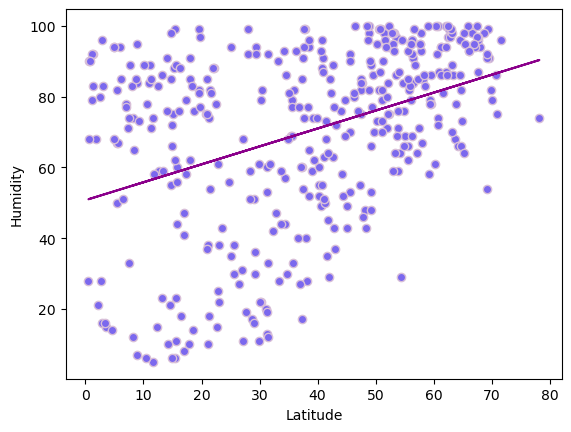

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, c = "mediumslateblue", edgecolors="thistle")
plt.plot(x_values, regress_values, "-r", color="darkmagenta")
plt.annotate(line_eq,(0,-20),fontsize=12,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.17717184654398063


C:\Users\12182\AppData\Local\Temp\ipykernel_16396\513997493.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "-r", c="saddlebrown")


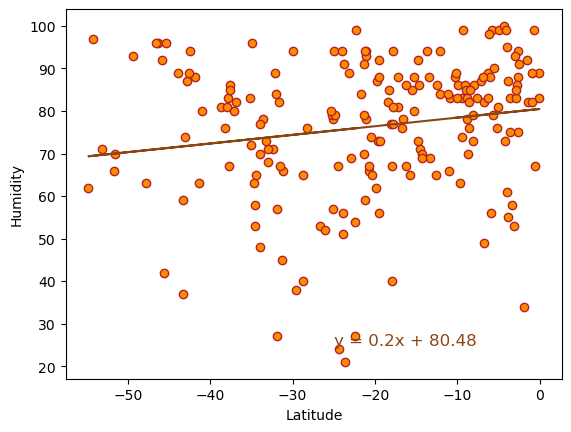

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, c = "darkorange", edgecolors="firebrick")
plt.plot(x_values, regress_values, "-r", c="saddlebrown")
plt.annotate(line_eq,(-25,25),fontsize=12,color="saddlebrown")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 

Huminity seems to increase as latitude increases. When comparing the two linear regressons, you can see that the Northern Hemisphere looks to expereince higher levels of humidity as the latitude increases (getting closer to the equator). 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.23266145163481305


C:\Users\12182\AppData\Local\Temp\ipykernel_16396\401237611.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "-r", color="darkmagenta")


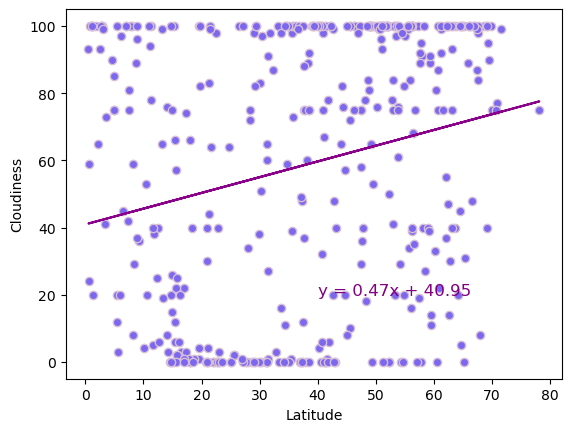

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, c = "mediumslateblue", edgecolors="thistle")
plt.plot(x_values, regress_values, "-r", color="darkmagenta")
plt.annotate(line_eq,(40,20),fontsize=12,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.2377623505813986


C:\Users\12182\AppData\Local\Temp\ipykernel_16396\3781571134.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "-r", c="saddlebrown")


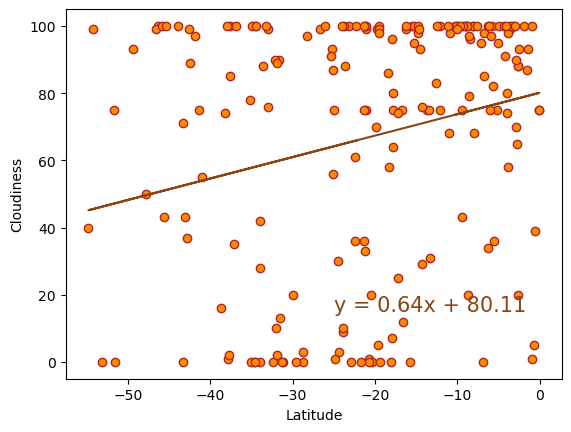

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, c = "darkorange", edgecolors="firebrick")
plt.plot(x_values, regress_values, "-r", c="saddlebrown")
plt.annotate(line_eq,(-25,15),fontsize=15,color="saddlebrown")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 

Similar to that of humindity, cloudiness looks to increase with altitude. In the Southern Hemisphere, the closer we get to the equator, the more clouds are present, which explains why our slope is so steep!

### Wind Speed vs. Latitude Linear Regression Plot

C:\Users\12182\AppData\Local\Temp\ipykernel_16396\1683547914.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "-r", color="darkmagenta")


The r-value is 0.0013400573043336444


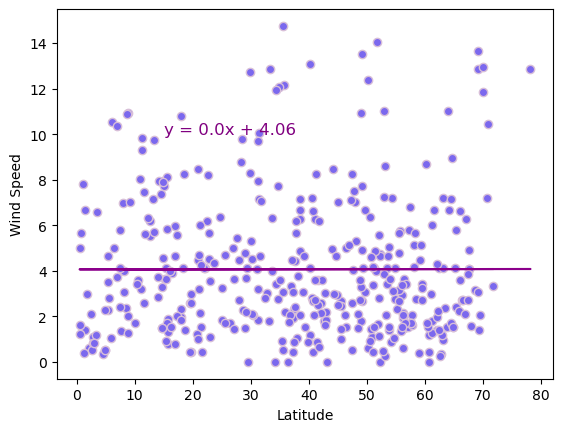

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, c = "mediumslateblue", edgecolors="thistle")
plt.plot(x_values, regress_values, "-r", color="darkmagenta")
plt.annotate(line_eq,(15,10),fontsize=12,color="purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.206200789744333


C:\Users\12182\AppData\Local\Temp\ipykernel_16396\3562389371.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, regress_values, "-r", c="saddlebrown" )


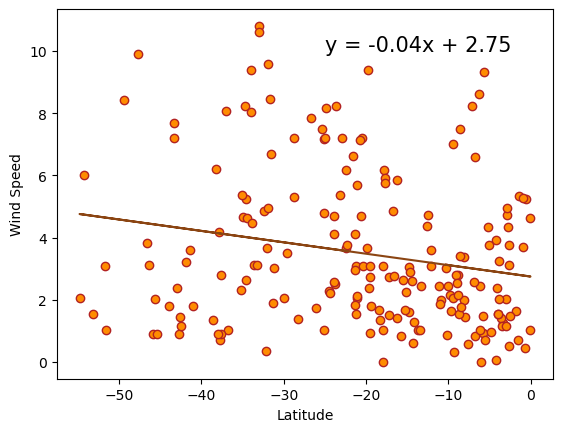

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values, c = "darkorange", edgecolors="firebrick")
plt.plot(x_values, regress_values, "-r", c="saddlebrown" )
plt.annotate(line_eq,(-25,10),fontsize=15,)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:**

Both graphs shrow a trend of a decrease in average wind speed as we move further away from the equator, however when taking linear regression into acocunt, the graph showing the Norther Hemisphere only shows a very small positive correlation, where the graph showing the Southern Hemisphere shows a steeper linear regression.